In [2]:
import cv2
import numpy as np
import pandas as pd
import pickle as cPickle
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,multilabel_confusion_matrix,recall_score

## Analysis of number of local SIFT features 

In order to understand the impact of the number of features retained by the SIFT detector, we ran a controlled experiment with the following independent variables:
* number of features of the SIFT detector, with a varying range from 1 to 700.
* SIFT detector, dense and non-dense.

We measure the performance of the system in terms of mean accuracy.

The code for this experiment can be found in the file "BagofVisualWords.ipynb", for which results were saved in order to be plot and analysed in this section.

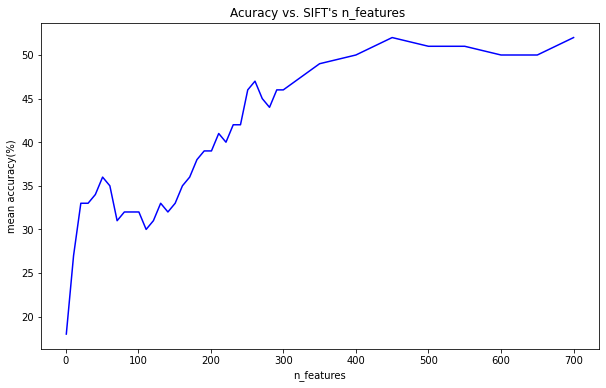

In [10]:
with open('n_features_accuracy.pkl','rb') as f:
    df=cPickle.load(f)
    
n_features = df.n_features.astype(float)
mean_accuracy = df.accuracy.astype(float)

plt.figure(figsize=(10,6))
plt.plot(n_features,mean_accuracy,color = 'blue',markerfacecolor='red', markersize=10)

plt.title('Acuracy vs. SIFT\'s n_features ')
plt.xlabel('n_features')
plt.ylabel('mean accuracy(%)')
plt.show()

We can see that n_features in SIFT creator directly impacts accuracy. More features on the image allows for more variance of words. We can also notice that above 300 features accuracy becomes plateau which can indicate that SIFT is not able to generate more features anymore and differences in plateau comes from different Kfold splits.

Interesting to add is that when the same is run for DENSE SIFT with step equals to 5. The means accuracy raises to 78% and this becomes irrelevant to number of features same 78% is obtained for n_features=600,300,100,50 and 10. This is just extra confirmation that there is a cut off value of local_features that does not impact further results. For DENSE Sift since we are analizing and creating descriptor from very small area of the image SIFT is not able to create more features than 10. Therefore even though computationally calculating dense is more expensive that not dense, we can limit number of features being calculated and achieve a lot better results as we are able to comparing smaller chunks of images.

## Analysis of KNN value and metrics impact on final result

To check the impact of K and metrices in Knn classifier, we decided to run the algorithm for basic values of SIFT with 300 features and kmeans k for codebooks = 128. 

Algorithm was run for values of k starting from 1 to 51, jumping by 2, for each value of k, 4 metrices were calculated: euclidean, manhattan, chebyshev and minkowski.

furthermore DENSE sift was explored with different step sizes of 5 and 20.

in the end LDA and PCA was run against the obtained results and final conlusion where drawn.

Below there is a pickle file with all data stored in single dataframe that is then used to visualize the outcomes. Code can be found in file "BagofVisualWords.ipynb"

In [17]:
with open('N300K128KNN1_51_ALL_FINAL.pkl','rb') as f:
    df_new=cPickle.load(f)

### Graph showing values of precision and recall for different values of DENSE SIFT

max
      knn  precision     recall  accuracy     metric  dense  pca  lda
246   27  63.194782  63.515415  63.07311  chebyshev      0    0    1


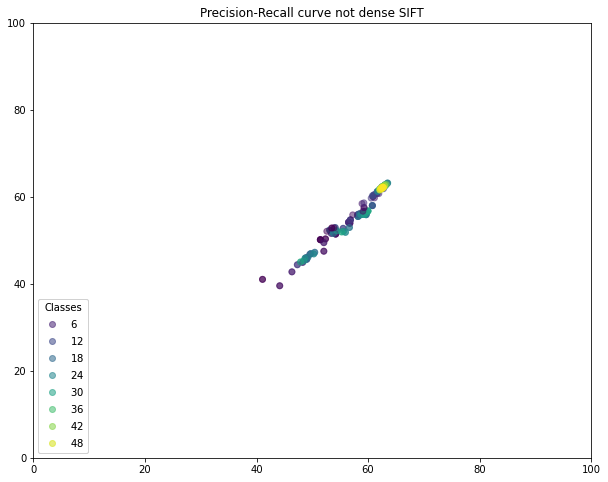

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve not dense SIFT', xlim=(0,100), ylim=(0,100))

df2=df_new[df_new.dense==0]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

We can see here wide spread of values trying to reaching 1-1 of precision recall curve having maximum value of 63% at knn equals to 27 when no dense sift is used. But lets see what happens when different dense SIFT is used

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


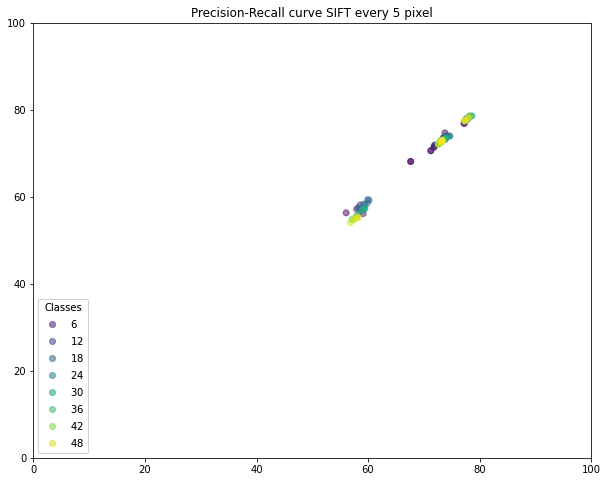

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve SIFT every 5 pixel', xlim=(0,100), ylim=(0,100))

df2=df_new[(df_new.dense==5)&(df_new.lda==0)]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

When DENSE is done with step size of 5, maximum value stays at KNN equals to 27 however it reaches 78%, what happens if we increase step size

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
409   37  78.551703  78.369286  78.066914  manhattan     20    0    0


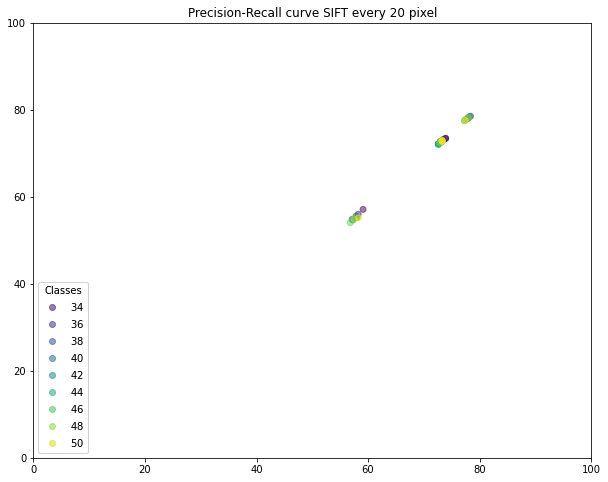

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve SIFT every 20 pixel', xlim=(0,100), ylim=(0,100))

df2=df_new[df_new.dense==20]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

With increased step size to 20, there is no noticable change in performance. Lets see now how the values changes for different metrices

### Graph showing values for different metrices of KNN

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0
     knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


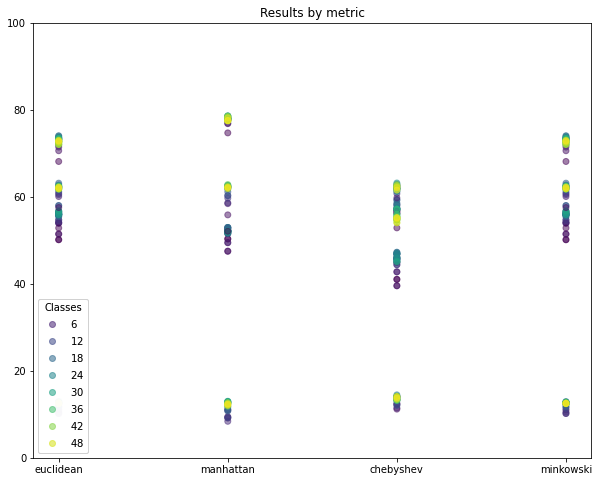

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Results by metric',ylim=(0,100))

df2=df_new
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.metric, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

We can notice here that values are grouped and widely spread along metrices and in addition that chebyshev metric seems to be performing worst where manhattan seems to yield best results. Let's see some better representation of the same data

### Graph showing metrices with knn values from 0-51 and dense 0 and 5 and no lda no pca

In [13]:
df2_man_d0=df_new[(df_new.metric=='manhattan')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_euc_d0=df_new[(df_new.metric=='euclidean')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_che_d0=df_new[(df_new.metric=='chebyshev')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_man_d5=df_new[(df_new.metric=='manhattan')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]
df2_euc_d5=df_new[(df_new.metric=='euclidean')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]
df2_che_d5=df_new[(df_new.metric=='chebyshev')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


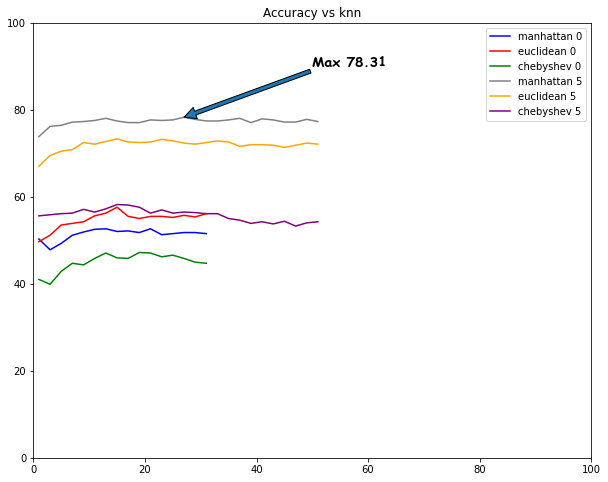

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Accuracy vs knn', xlim=(0,100), ylim=(0,100))

print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
ax.plot(df2_man_d0.knn, df2_man_d0.accuracy, color='b', label='manhattan 0')
ax.plot(df2_euc_d0.knn, df2_euc_d0.accuracy, color='r', label='euclidean 0')
ax.plot(df2_che_d0.knn, df2_che_d0.accuracy, color='g', label='chebyshev 0')
ax.plot(df2_man_d5.knn, df2_man_d5.accuracy, color='gray', label='manhattan 5')
ax.plot(df2_euc_d5.knn, df2_euc_d5.accuracy, color='orange', label='euclidean 5')
ax.plot(df2_che_d5.knn, df2_che_d5.accuracy, color='purple', label='chebyshev 5')
ax.legend()

max_val = max(df_new.accuracy)
max_idx = df_new.knn[df_new.accuracy.idxmax()]
# ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
#            weight='bold', size=14)

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
                weight='bold', size=14, 
                xytext=(.5, .9),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})

On above graph we can directly see that manhattan metric with density equal to 5 achieves way better results of almost 80% where other falls way behind.

Interetsingly for not densed SIFT euclidean distance shows better results that manhattan.

In addition even when densed sift shows a lot better results for other metrices when using Chebyshev metric it reaches almost same performance as euclidean with not densed SIFT.

### Showing that PCA equal to 64 components does not impact KNN algorithm where LDA equals to 7 improves it by 10% for not dense SIFT

In [15]:
df_new[(df_new.knn==27)&(df_new.dense==0)&(df_new.metric=='manhattan')]

,knn,precision,recall,accuracy,metric,dense,pca,lda
53,27,52.089132,55.596043,51.796778,manhattan,0,0,0
181,27,52.089132,55.596043,51.796778,manhattan,0,1,0
245,27,62.634501,62.943858,62.453532,manhattan,0,0,1


For best result of KNN=27 we can see that PCA shows the same values where LDA improves not dense values by 10%
However if we start changing PCA component we see differences:

In [18]:
with open('N300K128KNN27PCA2-102LDA0DENSE0-5.pkl','rb') as f:
    df_pca=cPickle.load(f)

In [20]:
df_pca

,knn,precision,recall,accuracy,metric,dense,pca,lda
0,27,43.038521,43.913511,43.742255,manhattan,5,2,0
1,27,69.785647,70.444976,69.640644,manhattan,5,12,0
2,27,72.683510,72.589147,71.871128,manhattan,5,22,0
3,27,74.288671,74.021201,73.605948,manhattan,5,32,0
4,27,74.506001,74.044923,73.605948,manhattan,5,42,0
5,27,73.719357,73.650114,72.986369,manhattan,5,52,0
6,27,74.080848,73.886574,73.110285,manhattan,5,62,0
7,27,73.751219,73.358324,72.862454,manhattan,5,72,0
8,27,74.457532,74.573914,73.482032,manhattan,5,82,0
9,27,74.865672,75.403498,73.853779,manhattan,5,92,0


max
     knn  precision     recall   accuracy     metric  dense  pca  lda
10   27  74.946304  75.423603  73.853779  manhattan      5  102    0


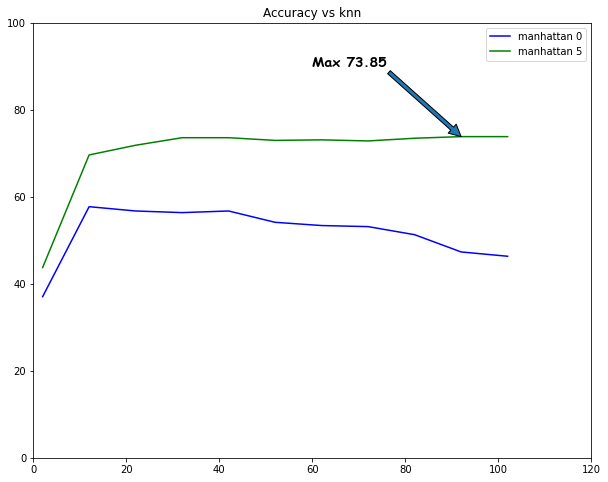

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Accuracy vs knn', xlim=(0,120), ylim=(0,100))
df2=df_pca
df2_dense0=df2[(df2.dense==0)]
df2_dense5=df2[(df2.dense==5)]
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
ax.plot(df2_dense0.pca, df2_dense0.accuracy, color='b', label='manhattan 0')
ax.plot(df2_dense5.pca, df2_dense5.accuracy, color='g', label='manhattan 5')
ax.legend()

max_val = max(df2_dense5.accuracy)
max_idx = df2_dense5.pca[df2_dense5.accuracy.idxmax()]
# ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
#            weight='bold', size=14)

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
                weight='bold', size=14, 
                xytext=(.5, .9),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})

As we see PCA is not improving the end result. it is rather few percent worst, however what we can notice is that for DENSE Sift the result is almost the same of 73% for PCA = 102 as for PCA=32 meaning we get a lot less components, 4 times less but accuracy stays the same.

For normal SIFT (not dense) we even see increase of performance at PCA = 22 reaching 56% whether for PCA=102 it gets only 46% and again without PCA accuracy is 52%.

We can do the same for LDA for best result of knn=27 to see its impact of final result. Remember we got 51% for no pca no lda. When we change the LDA from 1-7 we get following results

In [7]:
with open('N300K128KNN27PCA02LDA0-7DENSE0.pkl','rb') as f:
    df_lda=cPickle.load(f)

In [8]:
df_lda

,knn,precision,recall,accuracy,metric,dense,pca,lda
0,27,33.390348,33.421233,32.837670,manhattan,0,0,1
1,27,47.672314,46.534799,47.087980,manhattan,0,0,2
2,27,52.717581,53.140594,52.664188,manhattan,0,0,3
3,27,56.667898,56.883557,56.505576,manhattan,0,0,4
4,27,60.273685,60.315763,59.727385,manhattan,0,0,5
5,27,60.419076,60.418065,60.346964,manhattan,0,0,6
6,27,62.634501,62.943858,62.453532,manhattan,0,0,7


max
    knn  precision     recall   accuracy     metric  dense  pca  lda
6   27  62.634501  62.943858  62.453532  manhattan      0    0    7


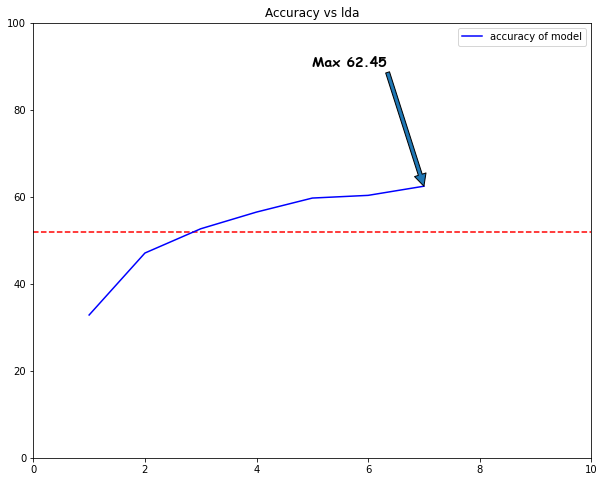

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Accuracy vs lda', xlim=(0,10), ylim=(0,100))
df2=df_lda
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
ax.plot(df2.lda, df2.accuracy, color='b', label='accuracy of model')
plt.hlines(y=52, xmin=0, xmax=96,color='r', linestyle='--')
ax.legend()

max_val = max(df2.accuracy)
max_idx = df2.lda[df2.accuracy.idxmax()]
# ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
#            weight='bold', size=14)

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
                weight='bold', size=14, 
                xytext=(.5, .9),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})

We can see here that with LDA above 3, model starts performing better than without LDA at all, reaching best value at its maximum LDA=7

## Conclusion of KNN value being changed and its metrics including pca, lda and DENSE SIFT
As we can see above for not dense SIFT we receive values between 40% to almost 60% the best results are shown in this case for euclidean distance.

For the Dense with step size = 5 we can see great improvemenet of almost 20% and the best accuracy reaches 78% using manhattan distance.

Chebyshev metric yelds worst results at all combinations.

We can see that increasing knn is not changing a lot the final accuracy and in some cases it also drops with higher numbers. For SIFT dense with step of 5 pixels best accuracy is shown for knn=27.

Last tabels shows no impact of PCA=64 to the results when parameters of knn is changed. However when testing for different amount of PCA we can see and for PCA = 12 and not dense SIFT actual result improves! Similarily with LDA improvement of result is seen already above LDA=3 reaching it best potential at LDA=7 which basically means it optimized best class distribution for all 7 available classes.

In addition there is no diference in results when density step is changed from 5 to 20.

Cross validation shows that for different splits we get different results but average score is around  the same value +/- certain value

## Analysis of K-means parameters

We have tested the code using several different parameters for the kmeans execution. These parameters with the value ranges are:

<li>Number of clusters (K) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ 16 - 128 ] </li>

<li>Number of neighbors (nneighbors) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[24 - 33] </li>

<li>Number of features (numFeatures) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[60 - 240] &nbsp;&nbsp;</li>

<li>Metric (Chebyshev, Euclidian, Manhattan, Minkowski) </li>

The results are as follows:

K =  16 &nbsp;&nbsp;Number of features =  60 &nbsp;&nbsp;Accuracy =  38.54<br>
K =  32 &nbsp;&nbsp;Number of features =  60 &nbsp;&nbsp;Accuracy =  40.15<br>
K =  64 &nbsp;&nbsp;Number of features =  60 &nbsp;&nbsp;Accuracy =  40.77<br>
K =  128 &nbsp;&nbsp;Number of features =  60 &nbsp;&nbsp;Accuracy =  41.64<br>
K =  16 &nbsp;&nbsp;Number of features =  120   &nbsp;&nbsp;Accuracy =  44.00<br>
K =  32 &nbsp;&nbsp;Number of features =  120   &nbsp;&nbsp;Accuracy =  46.77<br>
K =  64 &nbsp;&nbsp;Number of features =  120  &nbsp;&nbsp;Accuracy =  46.00<br>
K =  128 &nbsp;&nbsp;Number of features =  120  &nbsp;&nbsp;Accuracy =  46.72<br>
K =  16 &nbsp;&nbsp;Number of features =  180  &nbsp;&nbsp;Accuracy =  44.61<br>
K =  32 &nbsp;&nbsp;Number of features =  180   &nbsp;&nbsp;Accuracy =  49.18<br>
K =  64 &nbsp;&nbsp;Number of features =  180   &nbsp;&nbsp;Accuracy =  53.04<br>
K =  128 &nbsp;&nbsp;Number of features =  180   &nbsp;&nbsp;Accuracy =  52.24<br>
K =  16 &nbsp;&nbsp;Number of features =  240   &nbsp;&nbsp;Accuracy =  44.38<br>
K =  32 &nbsp;&nbsp;Number of features =  240   &nbsp;&nbsp;Accuracy =  52.99<br>
K =  64 &nbsp;&nbsp;Number of features =  240  &nbsp;&nbsp;Accuracy =  54.13<br>
K =  128 &nbsp;&nbsp;Number of features =  240   &nbsp;&nbsp;Accuracy =  54.43<br>

Sorted from worst to best, the best set of parameters are K = 128, Number of features = 240, number of clusters = 96 and using the Manhattan metric, and the worst is K = 16, Number of features = 60, number of clusters = 60 and using the Manhattan metric.




## Analysis of number of clusters in Kmeans

The number of clusters in the kmeans algorithm will determine the number of 'words' that will describe an image
in our bag of words implementation. It should be noted that this affects the dimensionality of our feature space.

In order to find a number of clusters for our problem, we evaluate the performance of the system in terms of accuracy for values from 1 to 256. The following graph shows said experiment which we discuss below:

Text(0, 0.5, 'Accuracy')

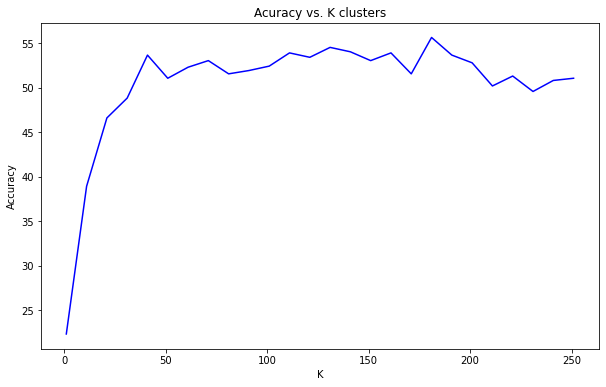

In [4]:
with open('accuracy_kmeans.pkl','rb') as f:
    accuracy_kmeans=cPickle.load(f)

plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,256,10)],accuracy_kmeans,color = 'blue',markerfacecolor='red', markersize=10)

plt.title('Acuracy vs. K clusters')
plt.xlabel('K')
plt.ylabel('Accuracy')

Though the previous plot shows the highest performance at k=181, using the elbow method for which we determine a k value at which the performance slows the rate of improvement, this value being around 50. 

## Analysis of dimensionality reduction using PCA

The use of the PCA algorithm allows for an ease of complexity of the feature space while keeping a certain percentage of its information, preferably high.
As shown in the following figure, this implies a trade-off between dimensionality reduction and loss minimization.
Usually, the number of components we want to keep is the 95% most representative part of our feature space (that is, the components that represent the 95% of the total variability of our data).

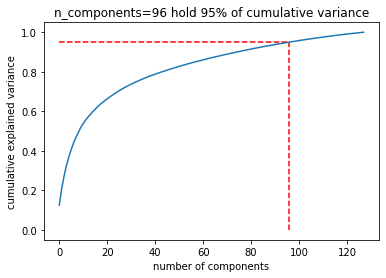

In [5]:
with open('n_components.pkl','rb') as f:
    df=cPickle.load(f)

n_components = df.iloc[0][0]
cumulative_explained_variance = df.iloc[1][0]

plt.plot(cumulative_explained_variance)
plt.hlines(y=0.95, xmin=0, xmax=96,color='r', linestyle='--')
plt.vlines(x=96, ymin=0, ymax=0.95,color='r', linestyle='--')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('n_components='+str(n_components)+' hold '+str(95)+'% of cumulative variance')
plt.show()

We compared the results of PCA with those without dimensionality reduction, producing the following figure:

Text(0, 0.5, 'Accuracy')

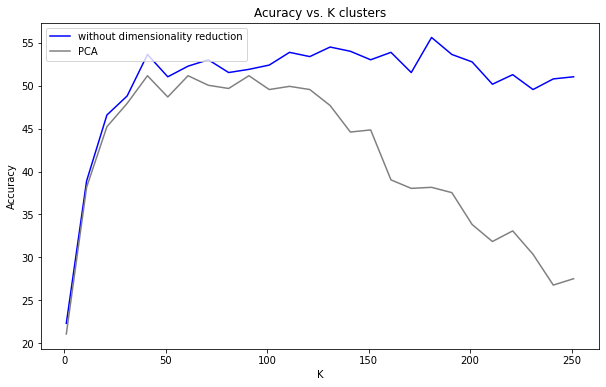

In [9]:
with open('accuracy_kmeans.pkl','rb') as f:
    accuracy_kmeans=cPickle.load(f)
    
with open('pca_accuracy.pkl','rb') as f:
    accuracy_pca = cPickle.load(f)

plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,256,10)],accuracy_kmeans,color = 'blue',markerfacecolor='red', markersize=10, label='without dimensionality reduction')
plt.plot([i for i in range(1,256,10)],accuracy_pca,color = 'gray',markerfacecolor='red', markersize=10, label='PCA')
plt.legend(loc="upper left")

plt.title('Acuracy vs. K clusters')
plt.xlabel('K')
plt.ylabel('Accuracy')

With more K clusters, the accuracy using PCA takes a nosedive. We believe this is due to the new clusters breaking up more important features and PCA selecting whatever it can. This results in what could have been a good classifying feature being broken up into chunks that do not help the classification. 